In [1]:
# Importing packages
import requests  
import pandas as pd
import sklearn
import nltk
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.feature_extraction import text
from sklearn.metrics import ConfusionMatrixDisplay
from nltk.stem import WordNetLemmatizer
from sklearn import svm
import time

In [2]:
#Import the data frame
mtg = pd.read_csv("MTG_Cards")
mtg = mtg.drop(columns = "Unnamed: 0")
mtg

,Name,Text,Flavor,Color,Cost,Type,Rarity
0,+2 Mace,Equipped creature gets +2/+2 Equip {3} {3}: At...,The weight of this magic weapon falls heavy on...,White,{1}{W},Artifact — Equipment,common
1,Abbey Gargoyles,Flying protection from red,Though Serra has not been seen for twenty year...,White,{2}{W}{W}{W},Creature — Gargoyle,uncommon
2,Abbey Griffin,Flying vigilance,The darkness crawls with vampires and ghouls b...,White,{3}{W},Creature — Griffin,common
3,Abbey Matron,{W} {T}: Abbey Matron gets +0/+3 until end of ...,The Matrons are kindly souls but don t ask one...,White,{2}{W},Creature — Human Cleric,common
4,Abeyance,Until end of turn target player can t cast ins...,I m too modest a wizard to reveal the full ext...,White,{1}{W},Instant,rare
...,...,...,...,...,...,...,...
12039,Wolf's Quarry,Create three 1/1 green Boar creature tokens wi...,The monster was gaining on them Twice it had f...,Green,{4}{G}{G},Sorcery,common
12040,Wolf Strike,Target creature you control gets +2/+0 until e...,Tovolar s howlpack had scattered but the Dire ...,Green,{2}{G},Instant,common
12041,Wolverine Pack,Rampage 2 Whenever this creature becomes block...,Give them great meals of beef and iron and ste...,Green,{2}{G}{G},Creature — Wolverine,uncommon
12042,Wolverine Riders,At the beginning of each upkeep create a 1/1 g...,We ll break their lines The rest of you follow,Green,{4}{G}{G},Creature — Elf Warrior,rare


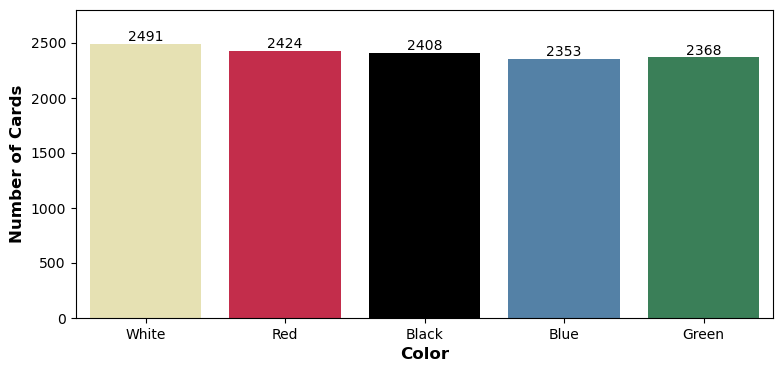

In [3]:
#Showing the distribution of the colors
plt.figure(figsize = (9, 4));
ax = sns.countplot(x = "Color", data = mtg, palette = ["palegoldenrod", "crimson", "black", "steelblue", "seagreen"]);
ax.set_ylim([0, 2800]);
ax.set_xlabel("Color", fontdict={"fontsize": 12, "weight": "bold"});
ax.set_ylabel("Number of Cards", fontdict={"fontsize": 12, "weight": "bold"});
for i in ax.containers:
    ax.bar_label(i,)

In [4]:
## Word Clouds ##

In [5]:
#Creating a list of all the card texts
all_cards_text = mtg["Text"].tolist()

#Creating a list of the card texts for each color
white_cards_text = mtg[mtg["Color"] == "White"]["Text"].tolist()
red_cards_text = mtg[mtg["Color"] == "Red"]["Text"].tolist()
blue_cards_text = mtg[mtg["Color"] == "Blue"]["Text"].tolist()
black_cards_text = mtg[mtg["Color"] == "Black"]["Text"].tolist()
green_cards_text = mtg[mtg["Color"] == "Green"]["Text"].tolist()

In [6]:
#Defining a function that turns a list of strings into a single string
def listToString(x):
 
    #Initialize an empty string that will contain the output of the function
    string = " "
 
    #Create a single string by joining together the multiple elements of the input list
    return (string.join(x))

In [7]:
## Creating Word Cloud for All Cards ##

In [8]:
all_cards_text_forWC = listToString(all_cards_text)

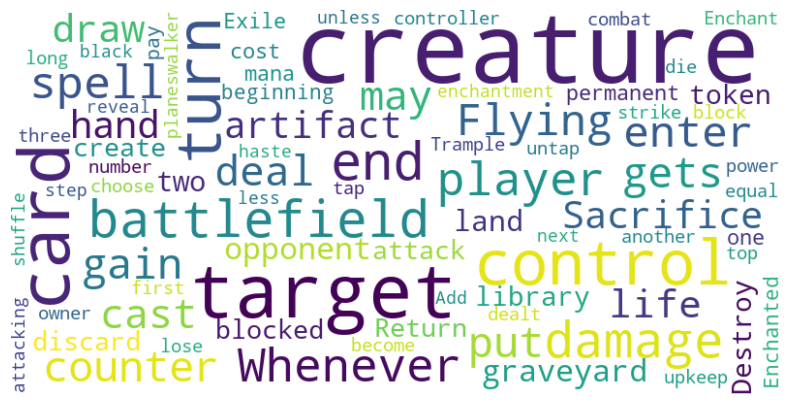

In [9]:
#Creating a word cloud from all cards. The default parameters tokenize the text and remove stopwords 
#according to WordCloud's built-in list
#Using min word length of 3
#Collocations is false to not include commonly seen together phrases, just looking at words
all_cards_wordcloud = WordCloud(width = 800, height = 400, 
                                max_font_size=100, max_words=80, background_color="white", 
                                min_word_length = 3, collocations = False).generate(all_cards_text_forWC)
plt.figure(figsize = (10,10))
plt.imshow(all_cards_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

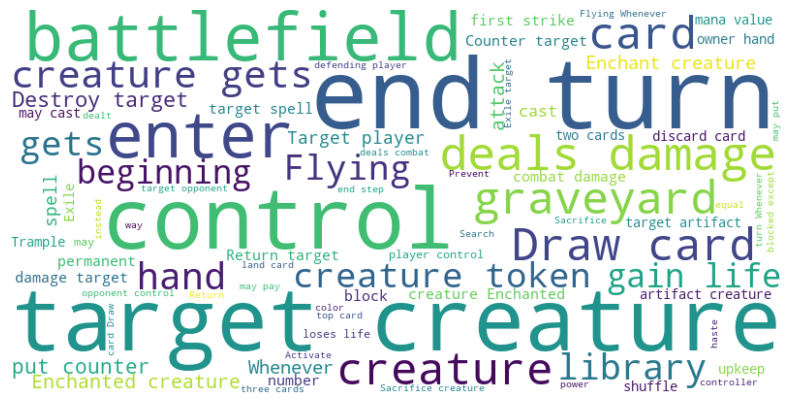

In [10]:
#Creating a word cloud from all cards. The default parameters tokenize the text and remove stopwords 
#according to WordCloud's built-in list
#Using min word length of 3
all_cards_wordcloud = WordCloud(width = 800, height = 400, 
                                max_font_size=100, max_words=80, background_color="white", 
                                min_word_length = 3).generate(all_cards_text_forWC)
plt.figure(figsize = (10,10))
plt.imshow(all_cards_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [11]:
## Creating Word Cloud for White Cards ##

In [12]:
white_cards_text_forWC = listToString(white_cards_text)

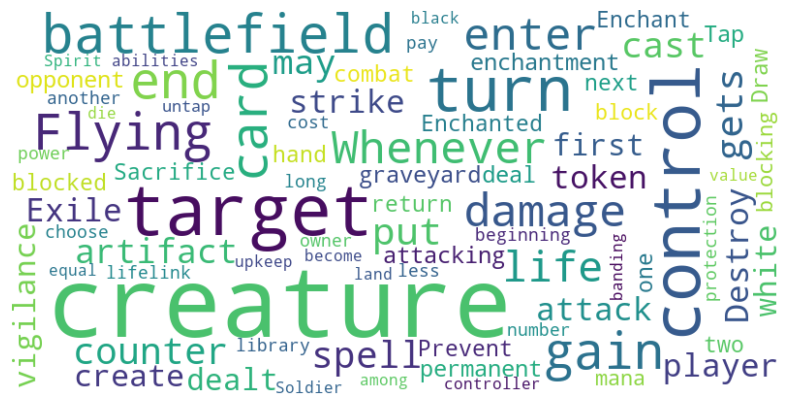

In [13]:
#Creating a word cloud from all cards. The default parameters tokenize the text and remove stopwords 
#according to WordCloud's built-in list
#Using min word length of 3
#Collocations is false to not include commonly seen together phrases, just looking at words
white_cards_wordcloud = WordCloud(width = 800, height = 400, 
                                max_font_size=100, max_words=80, background_color="white", 
                                min_word_length = 3, collocations = False).generate(white_cards_text_forWC)
plt.figure(figsize = (10,10))
plt.imshow(white_cards_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

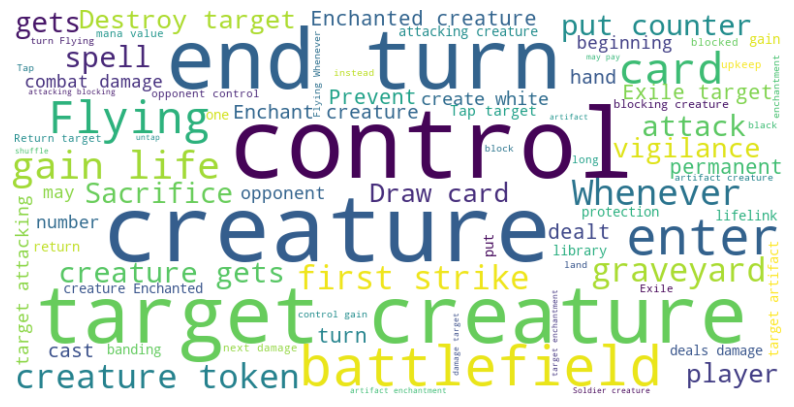

In [14]:
#Creating a word cloud from all cards. The default parameters tokenize the text and remove stopwords 
#according to WordCloud's built-in list
#Using min word length of 3
white_cards_wordcloud = WordCloud(width = 800, height = 400, 
                                max_font_size=100, max_words=80, background_color="white", 
                                min_word_length = 3).generate(white_cards_text_forWC)
plt.figure(figsize = (10,10))
plt.imshow(white_cards_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [15]:
## Creating Word Cloud for Red Cards ##

In [16]:
red_cards_text_forWC = listToString(red_cards_text)

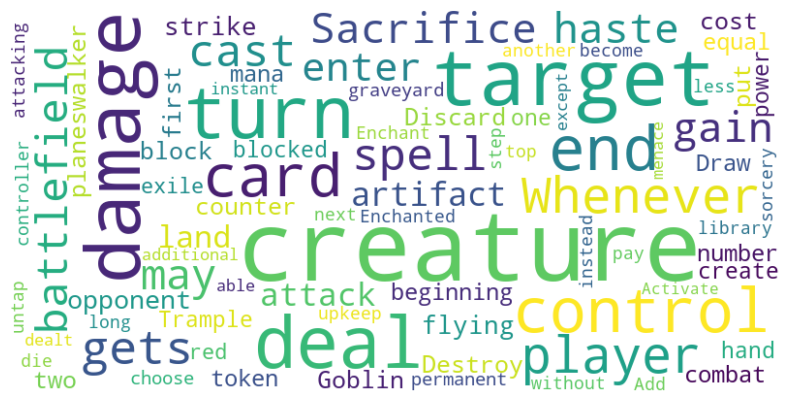

In [17]:
#Creating a word cloud from all cards. The default parameters tokenize the text and remove stopwords 
#according to WordCloud's built-in list
#Using min word length of 3
#Collocations is false to not include commonly seen together phrases, just looking at words
red_cards_wordcloud = WordCloud(width = 800, height = 400, 
                                max_font_size=100, max_words=80, background_color="white", 
                                min_word_length = 3, collocations = False).generate(red_cards_text_forWC)
plt.figure(figsize = (10,10))
plt.imshow(red_cards_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

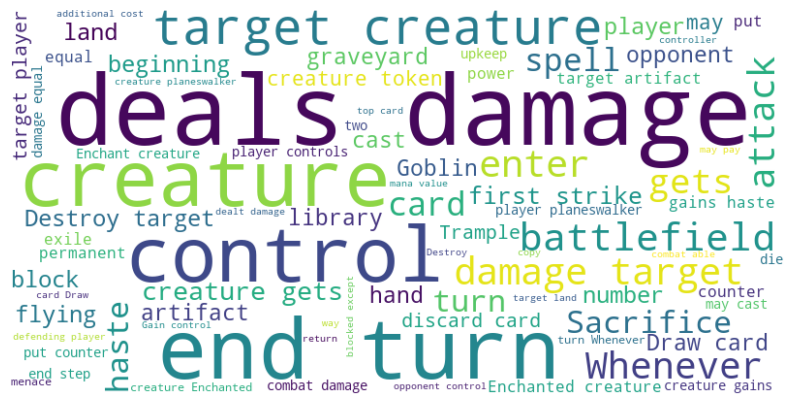

In [18]:
#Creating a word cloud from all cards. The default parameters tokenize the text and remove stopwords 
#according to WordCloud's built-in list
#Using min word length of 3
red_cards_wordcloud = WordCloud(width = 800, height = 400, 
                                max_font_size=100, max_words=80, background_color="white", 
                                min_word_length = 3).generate(red_cards_text_forWC)
plt.figure(figsize = (10,10))
plt.imshow(red_cards_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [19]:
## Creating Word Cloud for Blue Cards ##

In [20]:
blue_cards_text_forWC = listToString(blue_cards_text)

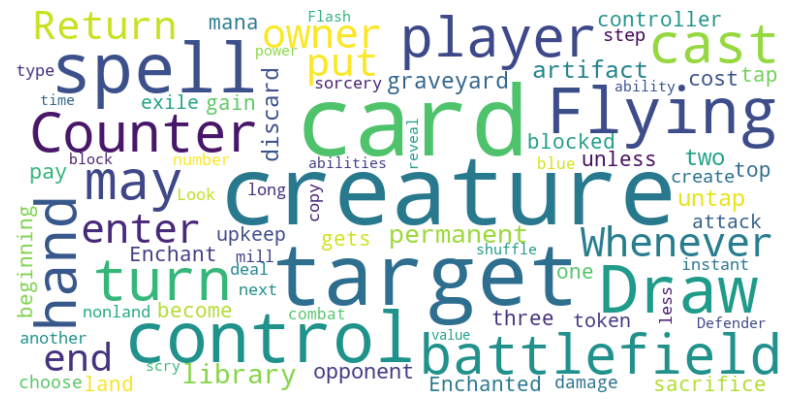

In [21]:
#Creating a word cloud from all cards. The default parameters tokenize the text and remove stopwords 
#according to WordCloud's built-in list
#Using min word length of 3
#Collocations is false to not include commonly seen together phrases, just looking at words
blue_cards_wordcloud = WordCloud(width = 800, height = 400, 
                                max_font_size=100, max_words=80, background_color="white", 
                                min_word_length = 3, collocations = False).generate(blue_cards_text_forWC)
plt.figure(figsize = (10,10))
plt.imshow(blue_cards_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

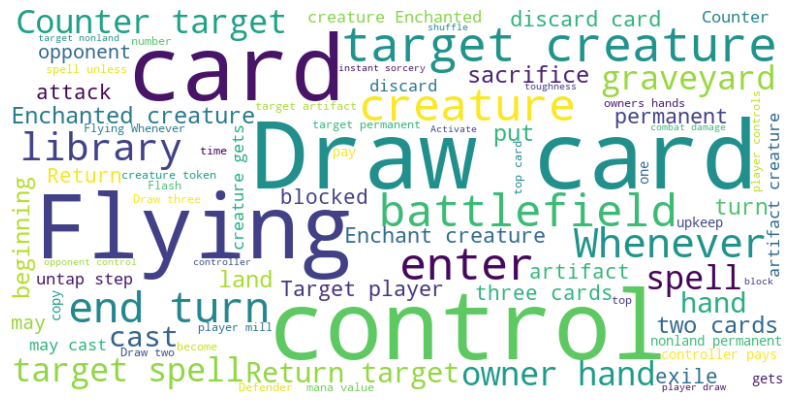

In [22]:
#Creating a word cloud from all cards. The default parameters tokenize the text and remove stopwords 
#according to WordCloud's built-in list
#Using min word length of 3
blue_cards_wordcloud = WordCloud(width = 800, height = 400, 
                                max_font_size=100, max_words=80, background_color="white", 
                                min_word_length = 3).generate(blue_cards_text_forWC)
plt.figure(figsize = (10,10))
plt.imshow(blue_cards_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [23]:
## Creating Word Cloud for Black Cards ##

In [24]:
black_cards_text_forWC = listToString(black_cards_text)

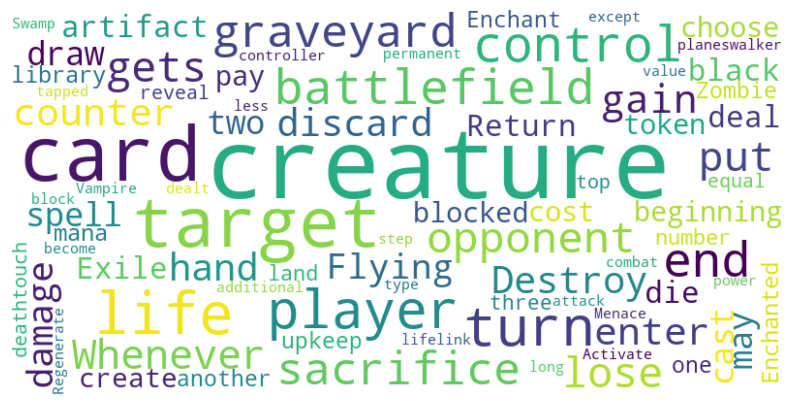

In [25]:
#Creating a word cloud from all cards. The default parameters tokenize the text and remove stopwords 
#according to WordCloud's built-in list
#Using min word length of 3
#Collocations is false to not include commonly seen together phrases, just looking at words
black_cards_wordcloud = WordCloud(width = 800, height = 400, 
                                max_font_size=100, max_words=80, background_color="white", 
                                min_word_length = 3, collocations = False).generate(black_cards_text_forWC)
plt.figure(figsize = (10,10))
plt.imshow(black_cards_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

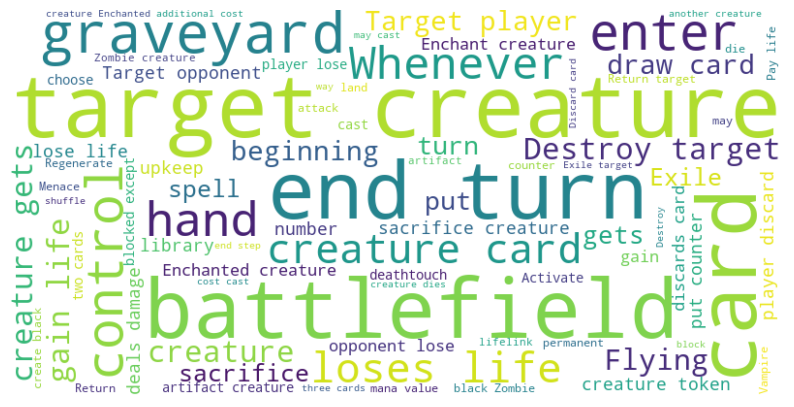

In [26]:
#Creating a word cloud from all cards. The default parameters tokenize the text and remove stopwords 
#according to WordCloud's built-in list
#Using min word length of 3
black_cards_wordcloud = WordCloud(width = 800, height = 400, 
                                max_font_size=100, max_words=80, background_color="white", 
                                min_word_length = 3).generate(black_cards_text_forWC)
plt.figure(figsize = (10,10))
plt.imshow(black_cards_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [27]:
## Creating Word Cloud for Green Cards ##

In [28]:
green_cards_text_forWC = listToString(green_cards_text)

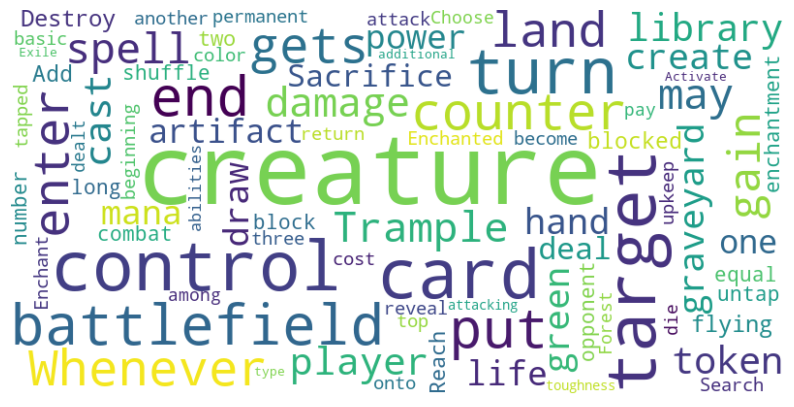

In [29]:
#Creating a word cloud from all cards. The default parameters tokenize the text and remove stopwords 
#according to WordCloud's built-in list
#Using min word length of 3
#Collocations is false to not include commonly seen together phrases, just looking at words
green_cards_wordcloud = WordCloud(width = 800, height = 400, 
                                max_font_size=100, max_words=80, background_color="white", 
                                min_word_length = 3, collocations = False).generate(green_cards_text_forWC)
plt.figure(figsize = (10,10))
plt.imshow(green_cards_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

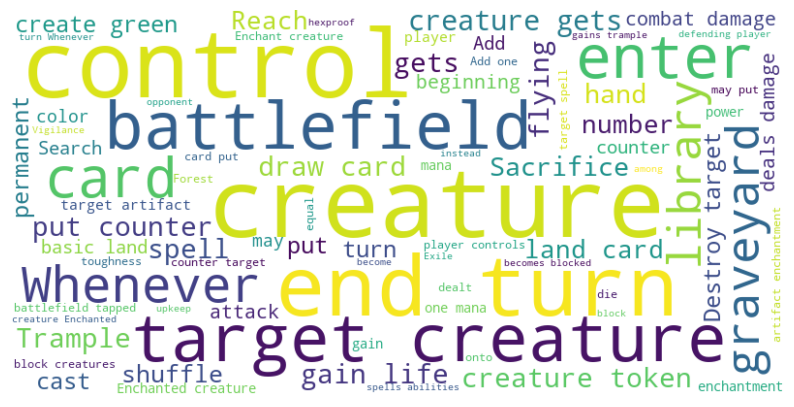

In [30]:
#Creating a word cloud from all cards. The default parameters tokenize the text and remove stopwords 
#according to WordCloud's built-in list
#Using min word length of 3
green_cards_wordcloud = WordCloud(width = 800, height = 400, 
                                max_font_size=100, max_words=80, background_color="white", 
                                min_word_length = 3).generate(green_cards_text_forWC)
plt.figure(figsize = (10,10))
plt.imshow(green_cards_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [31]:
'''
Notes:
Consider including the following as stop words due to prevalence among all cards regardless of color:
target
creature
control
battlefield
whenever
turn
end
opponent
player
card
artifact
cast
counter
spell'''

'\nNotes:\nConsider including the following as stop words due to prevalence among all cards regardless of color:\ntarget\ncreature\ncontrol\nbattlefield\nwhenever\nturn\nend\nopponent\nplayer\ncard\nartifact\ncast\ncounter\nspell'